In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider

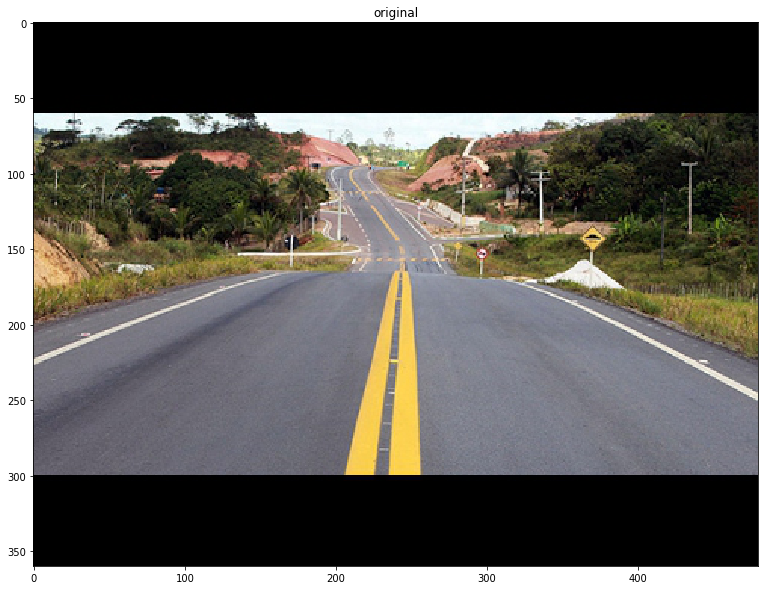

In [2]:
f_orig = cv.imread('../TestingImages/T5.jpg') #cv gives bgr, matlab requires rgb
f_rgb = cv.cvtColor(f_orig, cv.COLOR_BGR2RGB)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(f_rgb)
plt.title('original')
plt.show()

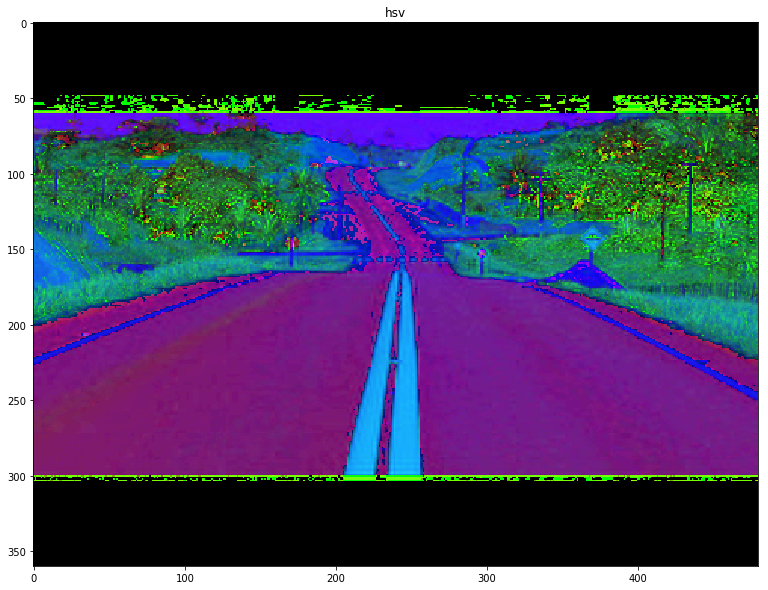

In [3]:
f_hsv = cv.cvtColor(f_orig, cv.COLOR_BGR2HSV)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(f_hsv)
plt.title('hsv')
plt.show()

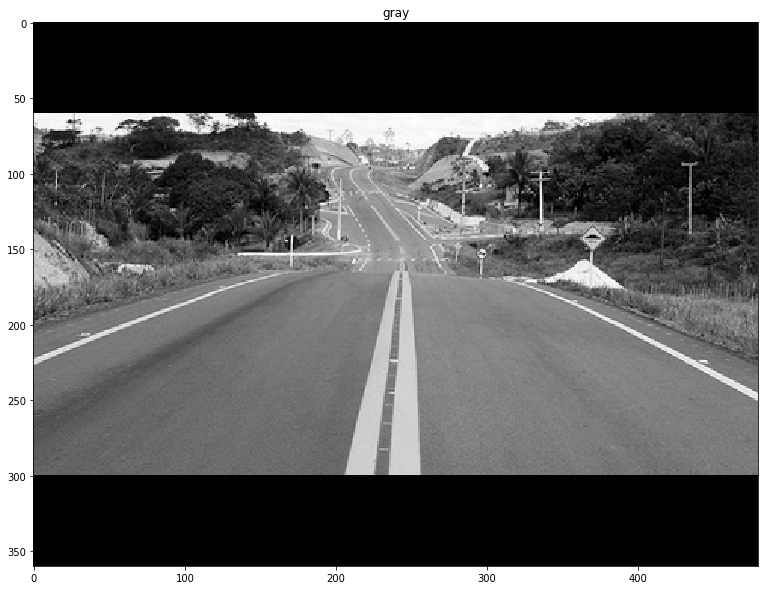

In [4]:
f_gray = cv.cvtColor(f_orig, cv.COLOR_BGR2GRAY)
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(f_gray, cmap='gray')
plt.title('gray')
plt.show()

In [5]:
class ClrThresholding:
    name = 'masked'
    lower_clr = np.array([14, 80, 154])
    upper_clr = np.array([23, 175, 255])
    
    def nothing(x):
        pass

    def clrFilteringHSV(self, frame_, frame_hsv_):
        mask = cv.inRange(frame_hsv_, self.lower_clr, self.upper_clr)
        res = cv.bitwise_and(frame_, frame_, mask=mask)
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.imshow(res)
        plt.title(self.name)
        plt.show()
        return res, mask
    
    def clrFilteringGRAY(self, frame_, frame_gry_):
        mask = cv.inRange(frame_gry_, self.lower_clr, self.upper_clr)
        
        masked_img = np.zeros_like(frame_)
        for i in range(3):
            masked_img[:,:,i] = mask
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.imshow(masked_img)
        plt.title(self.name)
        plt.show()
        return masked_img, mask

    def __init__(self, name_, lowerclr_, upper_clr_):
        self.lower_clr = lowerclr_
        self.upper_clr = upper_clr_
        self.name = name_


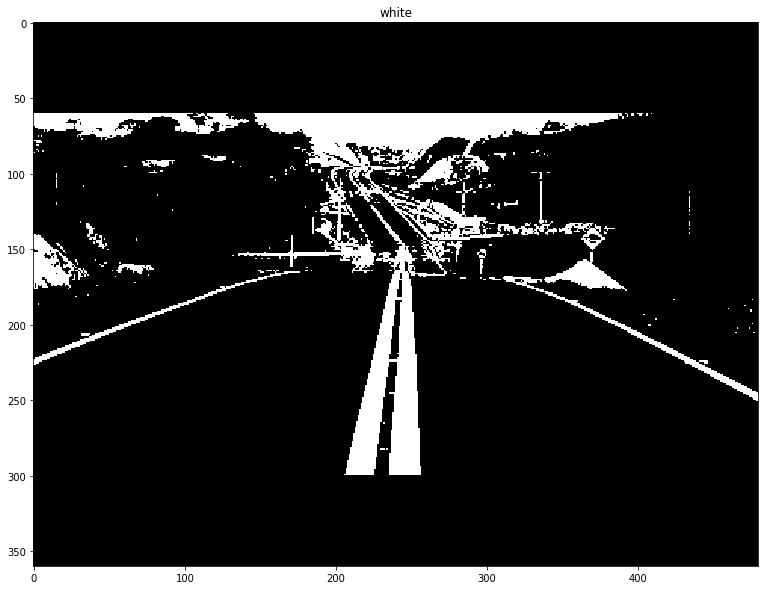

interactive(children=(IntSlider(value=158, description='a', max=255), Output(layout=Layout(height='500px'))), _dom_classes=('widget-interact',))

In [6]:
global Thre_clr_white, res_w, mask_w
Thre_clr_white= ClrThresholding('white', 158 , 255)
res_w, mask_w = Thre_clr_white.clrFilteringGRAY(f_rgb, f_gray)
def runWhiteFilter(a = 158):
    Thre_clr_white = ClrThresholding('white', a , 255)
    res_w, mask_w = Thre_clr_white.clrFilteringGRAY(f_rgb, f_gray)
    return

interactive_plot = interactive(runWhiteFilter, a=(0,255,1))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


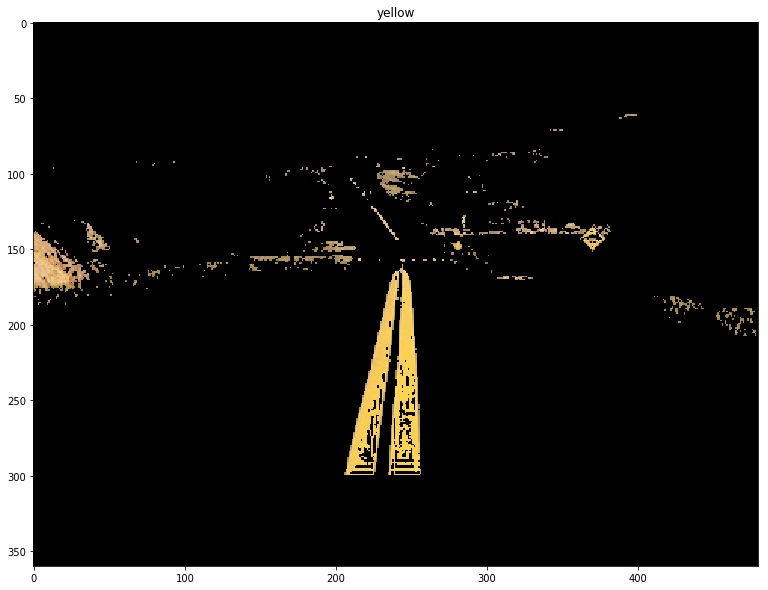

interactive(children=(IntSlider(value=14, description='lh', max=255), IntSlider(value=80, description='ls', max=255), IntSlider(value=154, description='lv', max=255), IntSlider(value=23, description='uh', max=255), IntSlider(value=175, description='us', max=255), IntSlider(value=255, description='uv', max=255), Output(layout=Layout(height='500px'))), _dom_classes=('widget-interact',))

In [7]:
global Thre_clr_yellow, res_y, mask_y
Thre_clr_yellow=ClrThresholding('yellow', np.array([14,80,154]), np.array([23,175,255]))
res_y, mask_y =Thre_clr_yellow.clrFilteringHSV(f_rgb, f_hsv)
def runYellowFilter(lh=14, ls=80, lv=154, uh=23, us=175, uv=255):
    Thre_clr_yellow = ClrThresholding('yellow', np.array([lh,ls,lv]), np.array([uh,us,uv]))
    res_y, mask_y = Thre_clr_yellow.clrFilteringHSV(f_rgb, f_hsv)
    return

interactive_plot2 = interactive(runYellowFilter, lh=(0,255,1),ls=(0,255,1),lv=(0,255,1),uh=(0,255,1),us=(0,255,1),uv=(0,255,1))
output = interactive_plot2.children[-1]
output.layout.height = '500px'
interactive_plot2


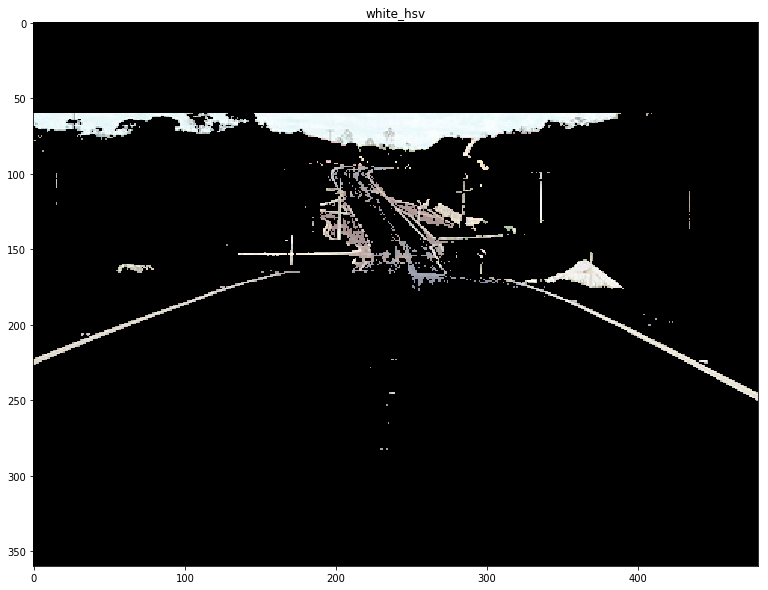

interactive(children=(IntSlider(value=0, description='lh', max=255), IntSlider(value=0, description='ls', max=255), IntSlider(value=164, description='lv', max=255), IntSlider(value=255, description='uh', max=255), IntSlider(value=48, description='us', max=255), IntSlider(value=255, description='uv', max=255), Output(layout=Layout(height='500px'))), _dom_classes=('widget-interact',))

In [8]:
global Thre_clr_whitehsv, res_wh, mask_wh
Thre_clr_whitehsv=ClrThresholding('white_hsv', np.array([0,0,164]), np.array([255,48,255]))
res_wh, mask_wh =Thre_clr_whitehsv.clrFilteringHSV(f_rgb, f_hsv)
def runwhiteHSVFilter(lh=0, ls=0, lv=164, uh=255, us=48, uv=255):
    Thre_clr_whitehsv = ClrThresholding('white_hsv', np.array([lh,ls,lv]), np.array([uh,us,uv]))
    res_wh, mask_wh = Thre_clr_whitehsv.clrFilteringHSV(f_rgb, f_hsv)
    return

interactive_plot3 = interactive(runwhiteHSVFilter, lh=(0,255,1),ls=(0,255,1),lv=(0,255,1),uh=(0,255,1),us=(0,255,1),uv=(0,255,1))
output = interactive_plot3.children[-1]
output.layout.height = '500px'
interactive_plot3


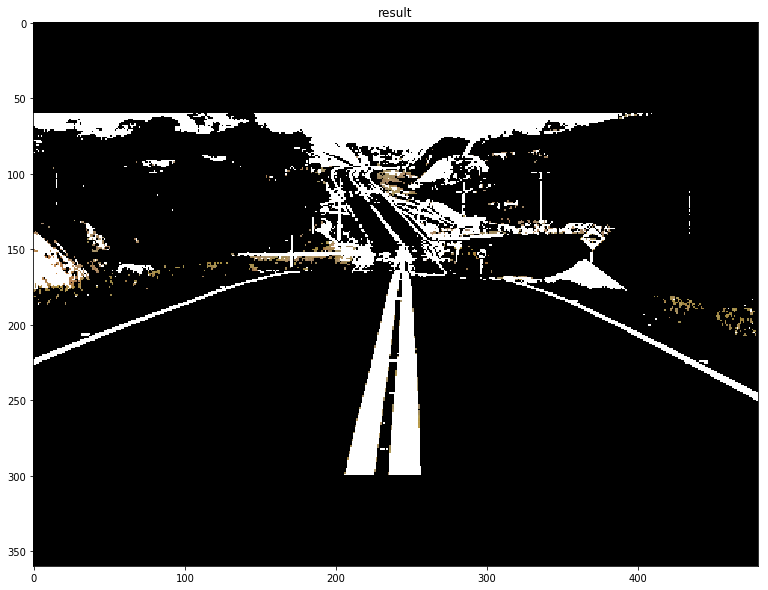

In [9]:
result = cv.addWeighted(res_y, 1.0, res_w, 1.0, 0.0)
plt.imshow(result)
plt.title('result')
plt.show()

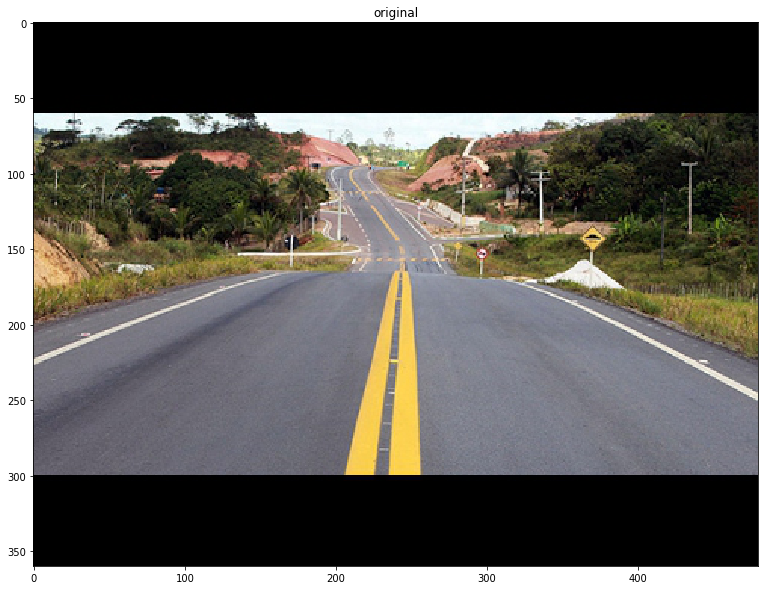

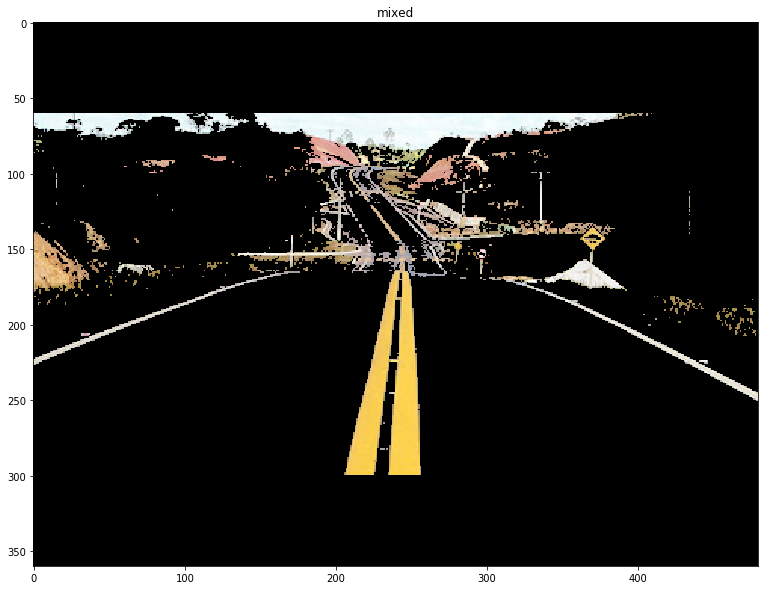

In [10]:
mixed_mask = mask_y|mask_w
mixed_res = cv.bitwise_and(f_rgb, f_rgb, mask=mixed_mask)
result = cv.addWeighted(res_y, 1.0, res_w, 1.0, 0.0)
plt.imshow(f_rgb)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('original')
plt.show()
plt.imshow(mixed_res)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('mixed')
plt.show()